In [1]:
 %load_ext autoreload
 %autoreload 2

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from raytrace3D import OnePointTrace3D

In [53]:
takeoff_angles = [(0, 0), (15, 0), (30, 0), (45, 0), (70, 0), (90,0)] #inclination, azimuth
lf = 100

dx = 0.10
dy = 0.10
dz = 0.10

x_coords = np.arange(100)*dx
y_coords = np.arange(100)*dy
z_coords = np.arange(100)*dz

xx, yy, zz = np.meshgrid(x_coords, y_coords, z_coords)
velocity = 1.5+1.0*zz

x_0 = x_coords[10] 
y_0 = y_coords[50]
z_0 =  z_coords[30]


src_coord = [(x_0, y_0, z_0), (x_0, y_0, z_0), (x_0, y_0, z_0),
             (x_0, y_0, z_0), (x_0, y_0, z_0), (x_0, y_0, z_0)]

tracer = OnePointTrace3D(src_coords=src_coord, 
                         takeoff_angles=takeoff_angles, 
                         velocity=velocity,
                         x_coords=x_coords, 
                         y_coords=y_coords, 
                         z_coords=z_coords,
                         lf=lf)

# Parallel Run

CPU times: user 104 ms, sys: 141 ms, total: 245 ms
Wall time: 1.11 s


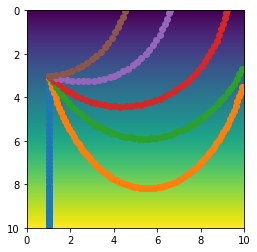

In [54]:
%%time
out = tracer.run(max_step=0.25, parallel=True, n_procs=6)

plt.imshow(velocity[:,50,:].T, extent =(0, 10, 10, 0))
for result in out:
    out_x = result['y'][0,:]
    out_y = result['y'][1,:]
    out_z = result['y'][2,:]
    plt.scatter(out_x, out_z)

# Serial Run

CPU times: user 2.88 s, sys: 22.8 ms, total: 2.9 s
Wall time: 2.89 s


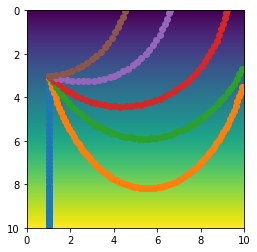

In [55]:
%%time

out = tracer.run(max_step=0.25, parallel=False)

plt.imshow(velocity[:,50,:].T, extent =(0, 10, 10, 0))
for result in out:
    out_x = result['y'][0,:]
    out_y = result['y'][1,:]
    out_z = result['y'][2,:]
    plt.scatter(out_x, out_z)


# 3D plotting of ray trajectory

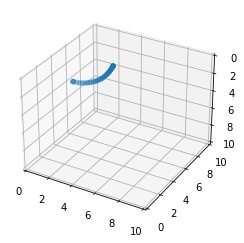

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(out_x, out_y, out_z)
ax.set_xlim(0,10)
ax.set_zlim(0,10)
ax.set_ylim(0,10)
ax.invert_zaxis()
